In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
dp = pd.read_csv('/content/loan_default_risk_dataset.csv')
dp.head()

,Retirement_Age,Debt_Amount,Monthly_Savings,Loan_Default_Risk
0,60.0,2996.52,2378.49,0
1,66.4,4137.23,1538.92,1
2,58.5,19865.75,2434.80,1
3,49.8,16855.70,2677.82,1
4,67.3,7902.37,2206.72,0


In [ ]:
dp.isnull().sum()

,0
Retirement_Age,0
Debt_Amount,1
Monthly_Savings,2
Loan_Default_Risk,0


In [ ]:
# for replacing null value
dp.fillna(dp.mean(),inplace=True)

In [ ]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Retirement_Age     300 non-null    float64
 1   Debt_Amount        300 non-null    float64
 2   Monthly_Savings    300 non-null    float64
 3   Loan_Default_Risk  300 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 9.5 KB


In [ ]:
dp[['Retirement_Age','Debt_Amount','Monthly_Savings','Loan_Default_Risk']].corr()

,Retirement_Age,Debt_Amount,Monthly_Savings,Loan_Default_Risk
Retirement_Age,1.000000,0.059508,0.030096,-0.421008
Debt_Amount,0.059508,1.000000,-0.028481,0.342097
Monthly_Savings,0.030096,-0.028481,1.000000,-0.497029
Loan_Default_Risk,-0.421008,0.342097,-0.497029,1.000000


In [ ]:
x=dp[['Retirement_Age','Debt_Amount','Monthly_Savings']]
y=dp['Loan_Default_Risk']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3 , random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [ ]:
y_prey_entropy = model.predict(x_test)


In [ ]:
accuracy_entropy = accuracy_score(y_test, y_prey_entropy)
print("Accuracy (Entropy):", accuracy_entropy)
print("\nClassification Report:\n", classification_report(y_test, y_prey_entropy))

Accuracy (Entropy): 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.81      0.90      0.85        29

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



Text(0.5, 1.0, 'Confusion Matrix')

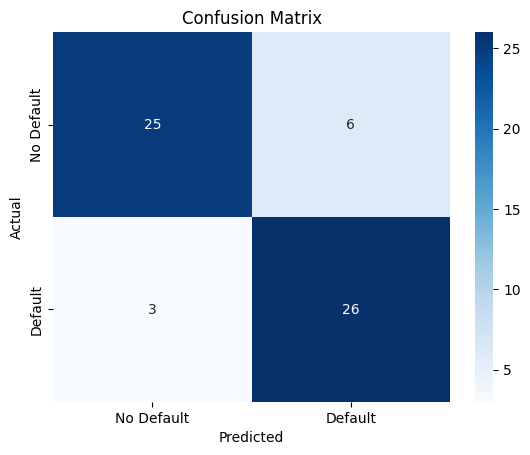

In [ ]:
conf_matrix = confusion_matrix(y_test, y_prey_entropy)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

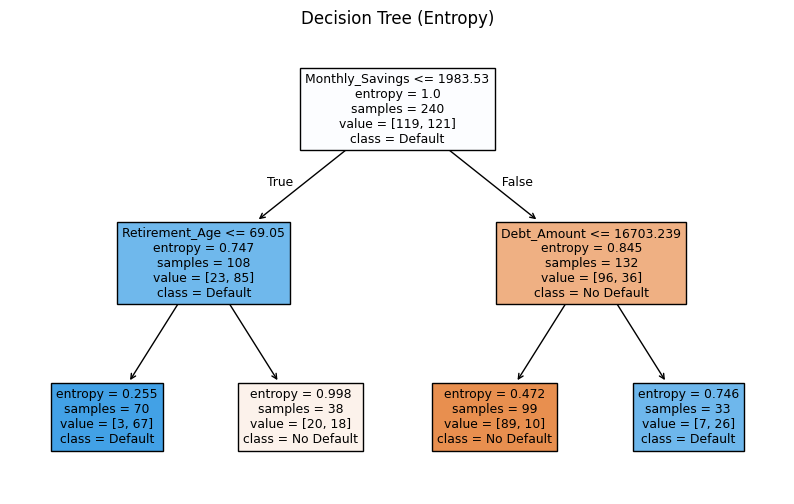

In [ ]:
plt.figure(figsize=(10, 6))
plot_tree(dt_entropy, filled=True, feature_names=x.columns, class_names=['No Default', 'Default'])
plt.title('Decision Tree (Entropy)')
plt.show()

In [ ]:
dt_entropy = DecisionTreeClassifier(criterion='entropy',
                                    max_depth=2,            #limit depth of the tree
                                    min_samples_split=3,    #Minimum sample to split a node
                                    min_samples_leaf=2,     # minimum sample per leaf
                                    random_state=42)

In [ ]:
dt_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2,
                       min_samples_split=3, random_state=42)

In [ ]:
y_pred_entropy = dt_entropy.predict(x_test)

In [ ]:
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy after applying constraints:", accuracy_entropy)

Accuracy after applying constraints: 0.8833333333333333


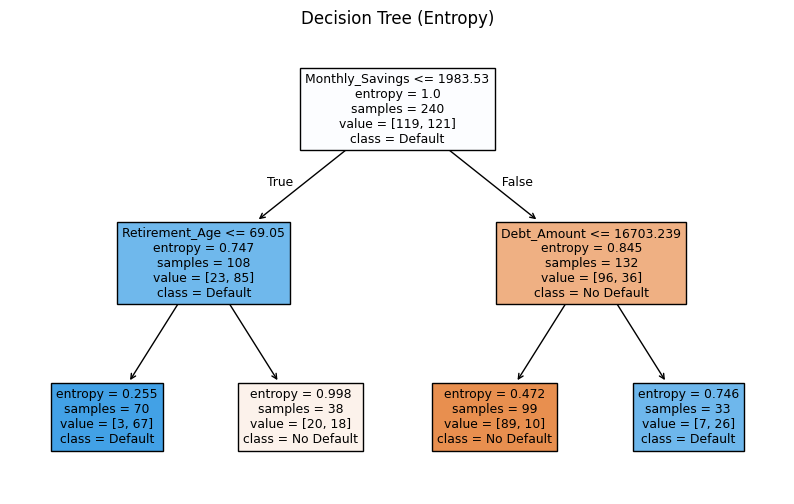

In [ ]:
plt.figure(figsize=(10, 6))
plot_tree(dt_entropy, filled=True, feature_names=x.columns, class_names=['No Default', 'Default'])
plt.title('Decision Tree (Entropy)')
plt.show()

In [ ]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3 , random_state=42)

In [ ]:
dt_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
y_prey_gini = dt_gini.predict(x_test)

In [ ]:
accuracy_gini = accuracy_score(y_test, y_prey_gini)
print("Accuracy (gini):", accuracy_gini)
print("\nClassification Report:\n", classification_report(y_test, y_prey_gini))

Accuracy (gini): 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.81      0.90      0.85        29

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



Text(0.5, 1.0, 'Confusion Matrix')

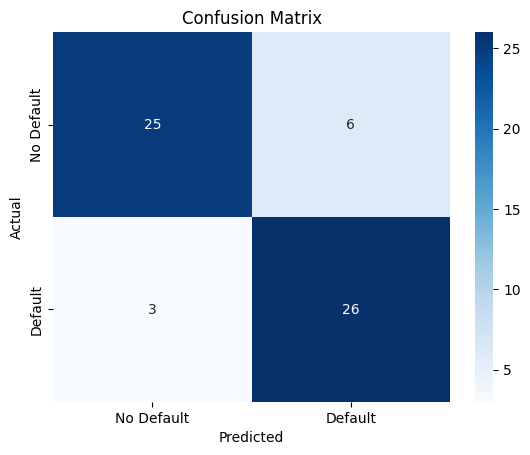

In [ ]:
conf_matrix = confusion_matrix(y_test, y_prey_gini)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


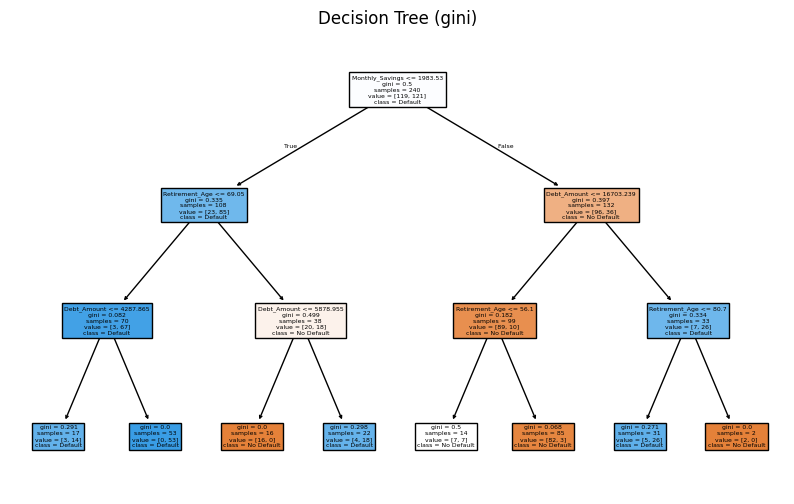

In [ ]:
plt.figure(figsize=(10, 6))
plot_tree(dt_gini, filled=True, feature_names=x.columns, class_names=['No Default', 'Default'])
plt.title('Decision Tree (gini)')
plt.show()

In [ ]:
dt_gini = DecisionTreeClassifier(criterion='gini',
                                    max_depth=2,            #limit depth of the tree
                                    min_samples_split=3,    #Minimum sample to split a node
                                    min_samples_leaf=2,     # minimum sample per leaf
                                    random_state=42)

In [ ]:
dt_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=3,
                       random_state=42)

In [ ]:
y_pred_gini = dt_gini.predict(x_test)

In [ ]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Accuracy after applying constraints:", accuracy_gini)

Accuracy after applying constraints: 0.8833333333333333


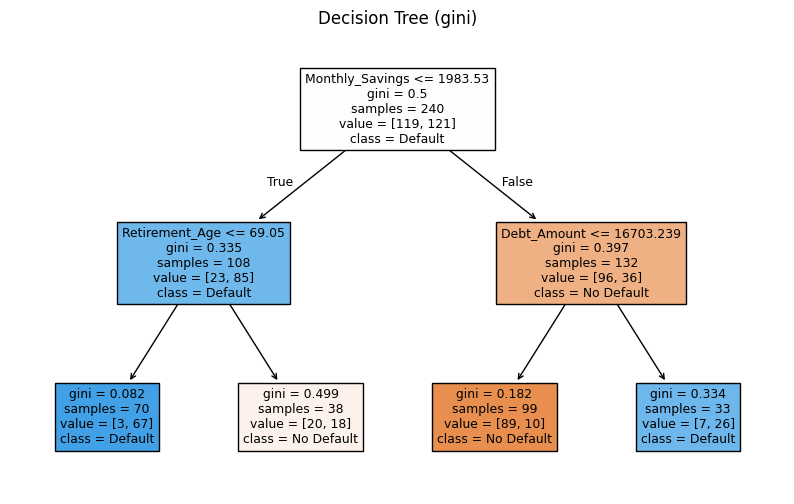

In [ ]:
plt.figure(figsize=(10, 6))
plot_tree(dt_gini, filled=True, feature_names=x.columns, class_names=['No Default', 'Default'])
plt.title('Decision Tree (gini)')
plt.show()